# Telecom Churn Analysis Using Python

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv('C:/Users/Rutuja/Downloads/Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0 and no charge is recorded and changed data type to float

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated().sum()

0

In [12]:
df["customerID"].duplicated().sum()

0

Convert 0 and 1 values of senior citizens to yes/no for better understanding

In [13]:
def conv(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [14]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Count of customers by churn')

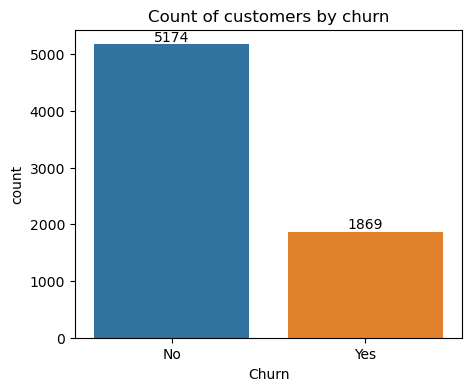

In [76]:
#count of churn
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Churn',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customers by churn')

Text(0.5, 1.0, 'Percentage of churned customer')

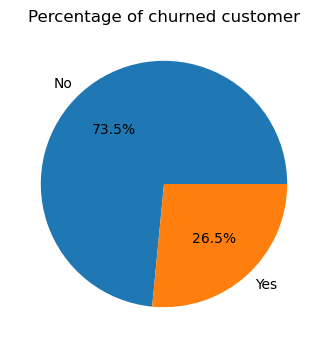

In [74]:
#Churn percentage
plt.figure(figsize=(4,4))
per=df.groupby(by="Churn").agg({'Churn':'count'})
plt.pie(x=per['Churn'],labels=per.index,autopct="%1.1f%%")
plt.title("Percentage of churned customer")

 From given pie chart we can comclude that 26.5% of our customers have churned out.
 now explore the reason behind it

Text(0.5, 1.0, 'Count of Churn by gender')

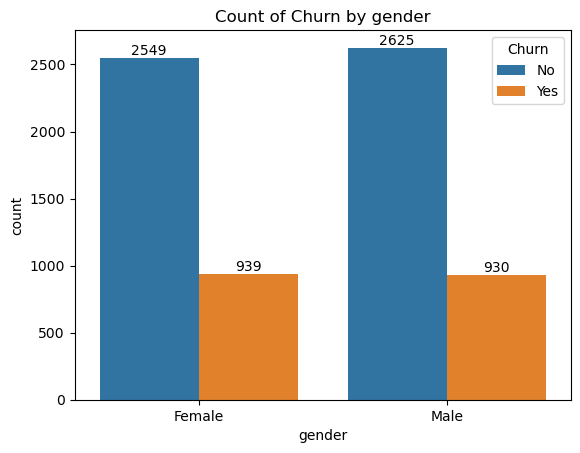

In [31]:
#count of churn gender
ax=sns.countplot(x='gender',data=df,hue='Churn')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of Churn by gender')

Text(0.5, 1.0, 'Count of customer by seniorcitizens')

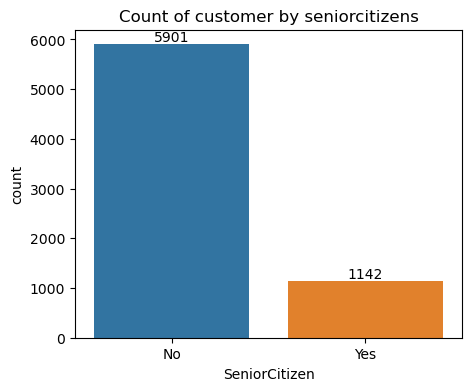

In [62]:
#count of customer by seniorcitizens
plt.figure(figsize=(5,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customer by seniorcitizens')

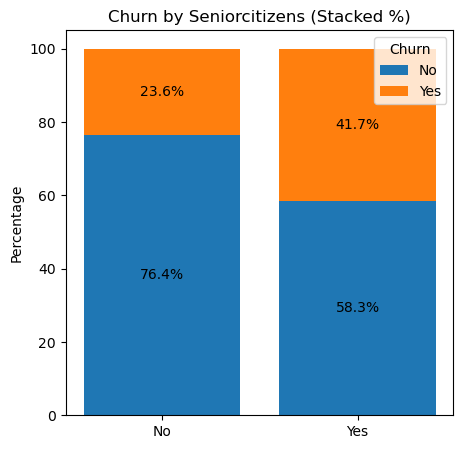

In [63]:
# Churn by seniorcitizens

counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
categories = percentages.index
bars = percentages.columns

bottoms = [0] * len(categories)

for bar in bars:
    values = percentages[bar]
    ax.bar(categories, values, bottom=bottoms, label=bar)
    for i, value in enumerate(values):
        if value > 0: 
            ax.text(i, bottoms[i] + value / 2, f'{value:.1f}%', ha='center',
                    va='center', color='Black', fontsize=10)
    bottoms = [b + v for b, v in zip(bottoms, values)]

# Add labels and title
plt.ylabel('Percentage')
plt.title('Churn by Seniorcitizens (Stacked %)')
plt.legend(title='Churn')
plt.show()

comparative a greater percentage of people in seniorcitizens category have churn

Text(0.5, 1.0, '')

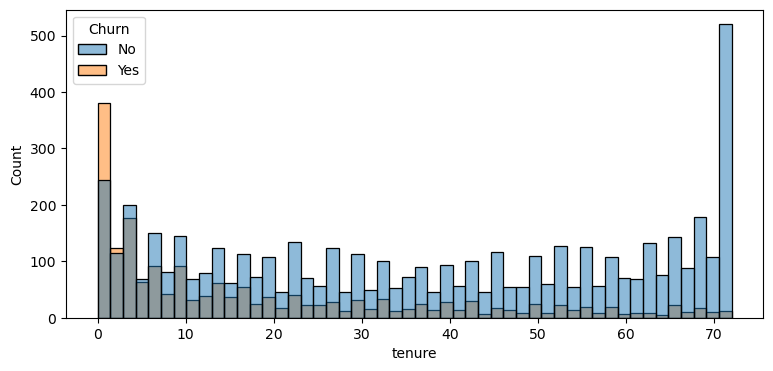

In [67]:
plt.figure(figsize=(9,4))
sns.histplot(data=df,x='tenure',bins=50,hue='Churn')
plt.title('')

People who have used our services for a long time have stayed and 
people who have used our services #1 or 2 months have churned

Text(0.5, 1.0, 'Count of customer by Contract')

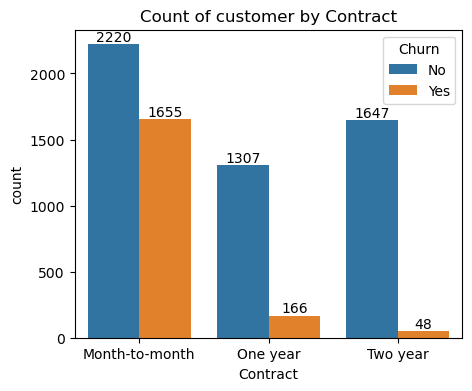

In [69]:
#count of customer by seniorcitizens
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customer by Contract')

People who have month to month contract are likely to
churned as compared to 1 or 2 years of contract

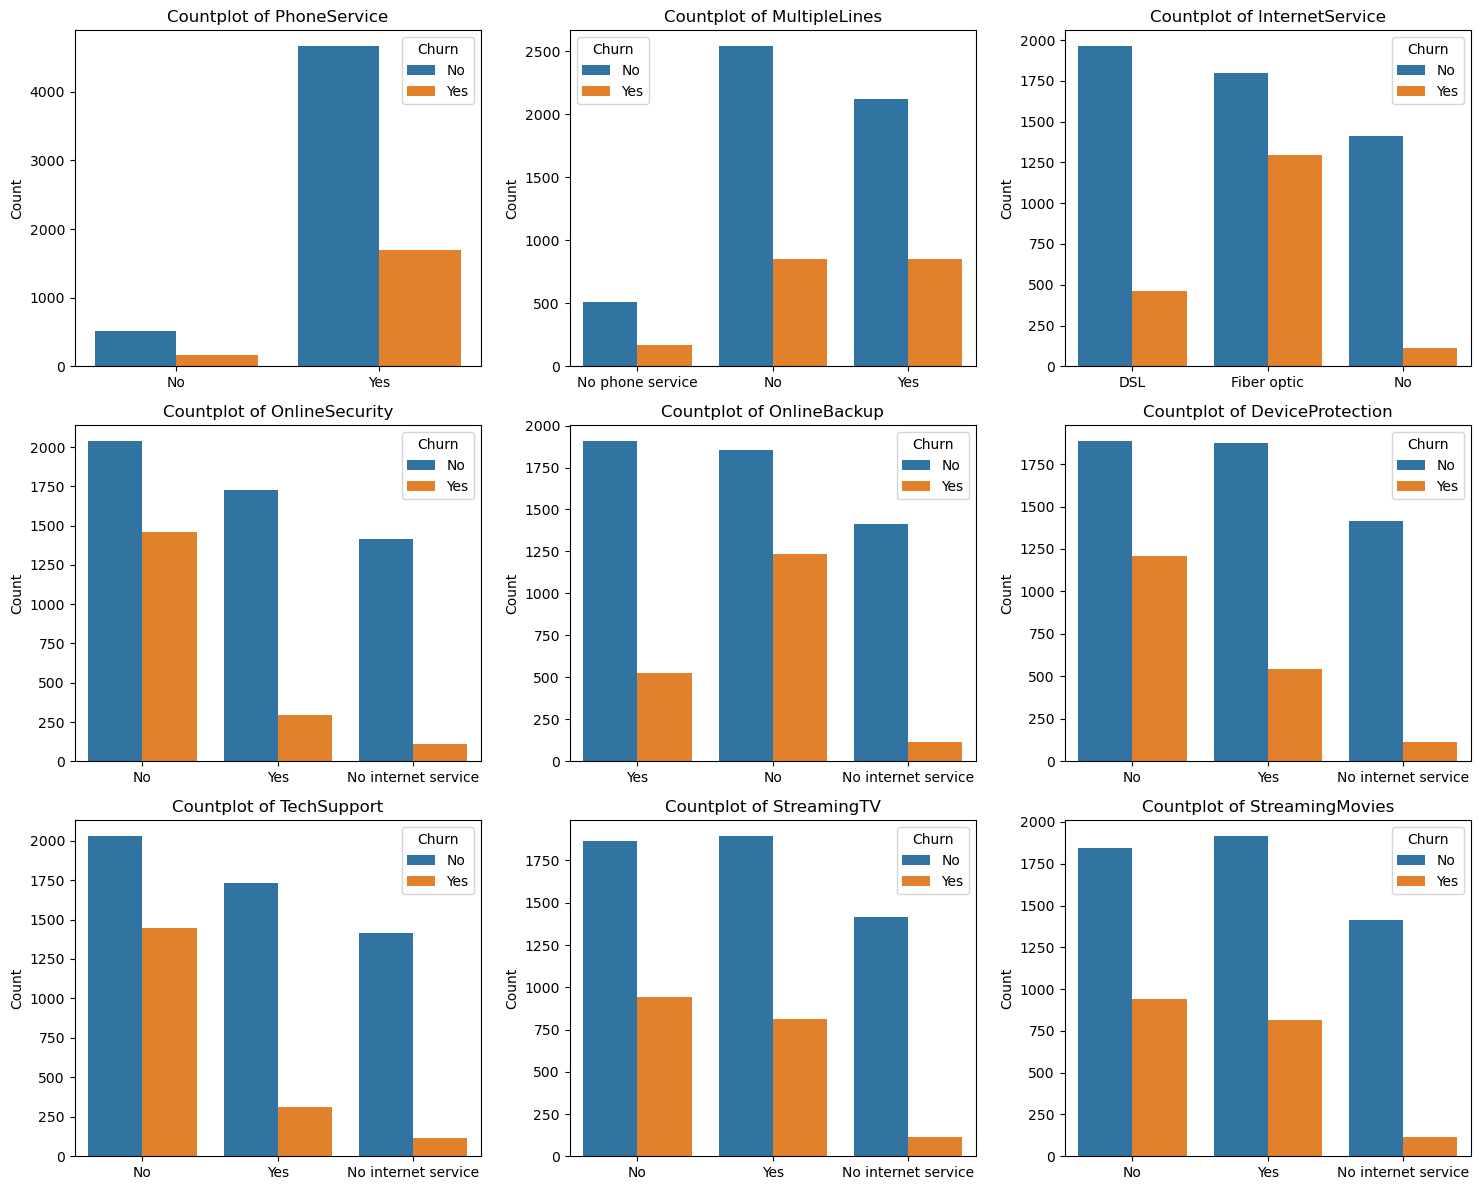

In [79]:
#Subplots of others columns

# Column names to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df['Churn'])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of people who do not churn tend to have services like PhoneService,InternetService
and onlineSecurity enabled.For service like onlineBackup , TechSupport and StremmingTv churn rates
are noticeably higher when these services are not used or not unavailable

Text(0.5, 1.0, 'Count of customer by PaymentMethod')

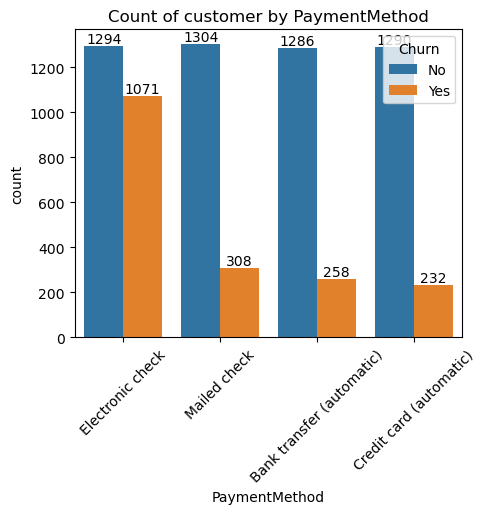

In [89]:
#count of customer by Paymentmethod 
plt.figure(figsize=(5,4))
ax=sns.countplot(x= 'PaymentMethod',data=df,hue='Churn')
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Count of customer by PaymentMethod')

Customer is likely to churn when he is using electronic check as a payment method